In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
spy = pd.read_csv('spy.csv')
spy["Profit?"] = (spy["High"] - spy["Low"]) > 0
spy.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,Profit?
0,1993-01-29,24.626128,24.626128,24.503610,24.608625,1003200,29,4,4,1,1993,True
1,1993-02-01,24.626124,24.783648,24.626124,24.783648,480500,1,0,5,2,1993,True
2,1993-02-02,24.766156,24.853669,24.713648,24.836166,201300,2,1,5,2,1993,True
3,1993-02-03,24.871164,25.116200,24.853662,25.098698,529400,3,2,5,2,1993,True
4,1993-02-04,25.186225,25.256235,24.906184,25.203728,531500,4,3,5,2,1993,True


In [3]:
# info about SPY dataframe's columns
spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     7974 non-null   object 
 1   Open     7974 non-null   float64
 2   High     7974 non-null   float64
 3   Low      7974 non-null   float64
 4   Close    7974 non-null   float64
 5   Volume   7974 non-null   int64  
 6   Day      7974 non-null   int64  
 7   Weekday  7974 non-null   int64  
 8   Week     7974 non-null   int64  
 9   Month    7974 non-null   int64  
 10  Year     7974 non-null   int64  
 11  Profit?  7974 non-null   bool   
dtypes: bool(1), float64(4), int64(6), object(1)
memory usage: 693.2+ KB


In [4]:
# get all the stats on each column
spy.describe()

,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
count,7974.000000,7974.000000,7974.000000,7974.000000,7.974000e+03,7974.000000,7974.000000,7974.000000,7974.000000,7974.000000
mean,149.713946,150.585149,148.759162,149.726437,8.393193e+07,15.733133,2.021696,26.532857,6.520191,2008.403185
std,124.401746,125.046106,123.708679,124.430293,9.136138e+07,8.753391,1.399649,14.891433,3.412048,9.148048
min,24.311077,24.381094,23.978528,24.311077,5.200000e+03,1.000000,0.000000,1.000000,1.000000,1993.000000
25%,70.495719,71.120042,69.982643,70.617613,1.060962e+07,8.000000,1.000000,14.000000,4.000000,2000.000000
50%,93.891379,94.601760,93.091615,93.935337,6.287465e+07,16.000000,2.000000,26.000000,7.000000,2008.000000
75%,189.736054,190.153339,189.275343,189.729782,1.138990e+08,23.000000,3.000000,39.000000,9.000000,2016.000000
max,574.380005,574.710022,570.419983,573.760010,8.710263e+08,31.000000,4.000000,53.000000,12.000000,2024.000000


In [5]:
# count missing values
missing_values = spy.isna().sum()
print(missing_values)

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
Day        0
Weekday    0
Week       0
Month      0
Year       0
Profit?    0
dtype: int64


In [6]:
translate_months = {1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"}
spy['Month'] = spy['Month'].astype(int) #<- ensures its a int
spy["Month"] = spy["Month"].map(translate_months)
spy_2021 = spy[spy["Year"] == 2021]
spy_2020 = spy[spy["Year"] == 2020]
spy_2021.head() # If running this causes null values or errors, 
# you have to run the entire notebook. 
# generally, please AVOID running this cell!!!!!

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,Profit?
7033,2021-01-04,355.650101,355.782781,345.709609,349.471649,110210800,4,0,1,January,2021,True
7034,2021-01-05,348.817847,352.987356,348.770449,351.878632,66426200,5,1,1,January,2021,True
7035,2021-01-06,350.343454,357.232648,349.784364,353.982300,107997700,6,2,1,January,2021,True
7036,2021-01-07,356.398757,359.999690,356.218707,359.241608,68766800,7,3,1,January,2021,True
7037,2021-01-08,360.653567,361.506416,357.346392,361.288483,71677200,8,4,1,January,2021,True


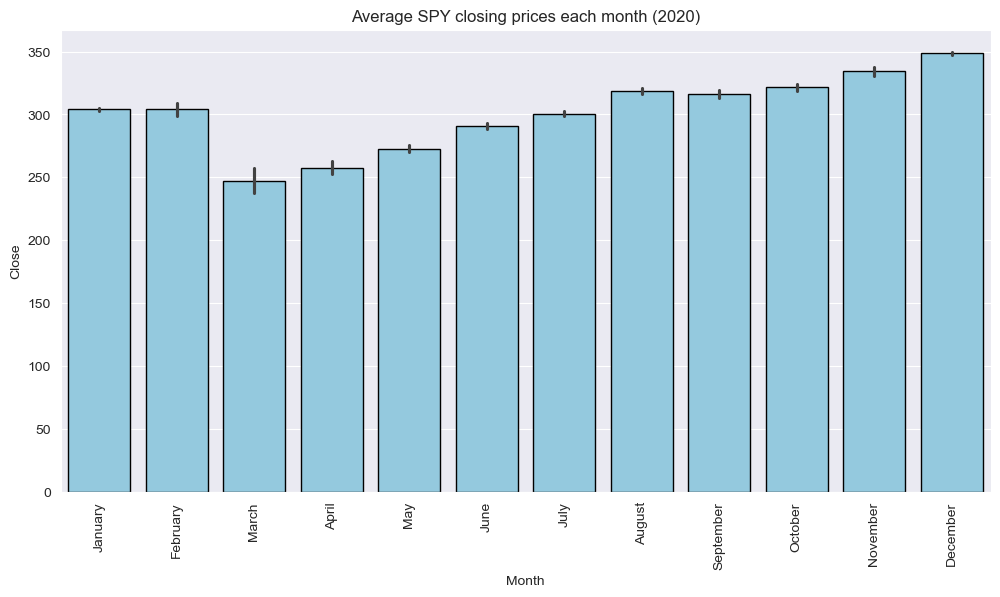

In [7]:
# bar chart analysis on average SPY ETF closing prices throughout each month 
# intended to illustrate ETF stock prices after the peak year (2020)
# of the COVID-19 pandemic.
# year 2021 is when Biden took administration and inherited 
# the Trump administration's changes + the still recent COVID pandemic 
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Average SPY closing prices each month (2020)")
bar_2020 = sns.barplot(data=spy_2020, x="Month", y="Close",
                       estimator=np.mean, color="skyblue", edgecolor="black")

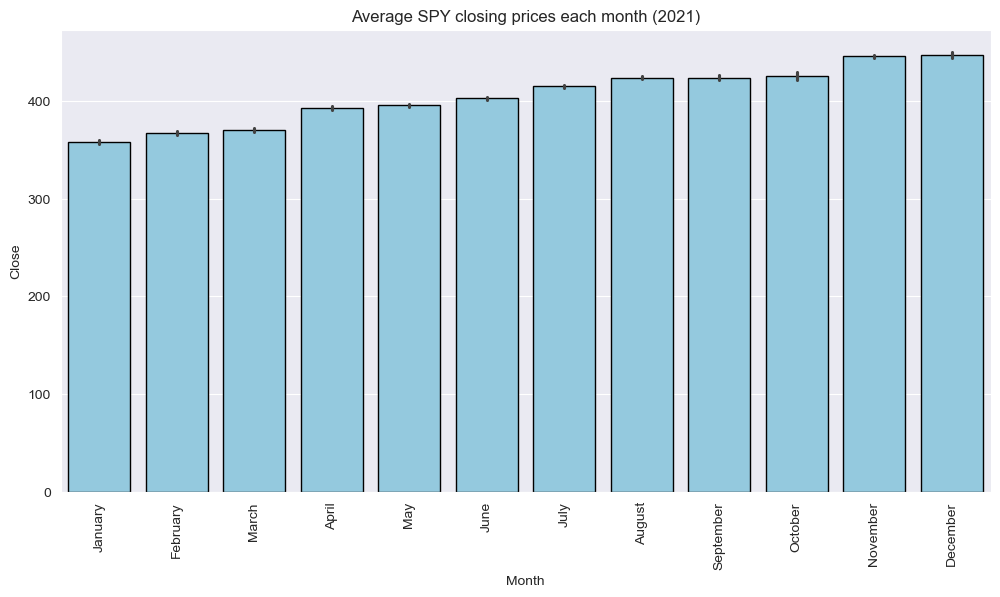

In [8]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Average SPY closing prices each month (2021)")
bar_2021 = sns.barplot(data=spy_2021, x="Month", y="Close", estimator=np.mean, color="skyblue", edgecolor="black")

## Exploring histograms on quantitative data of SPY 

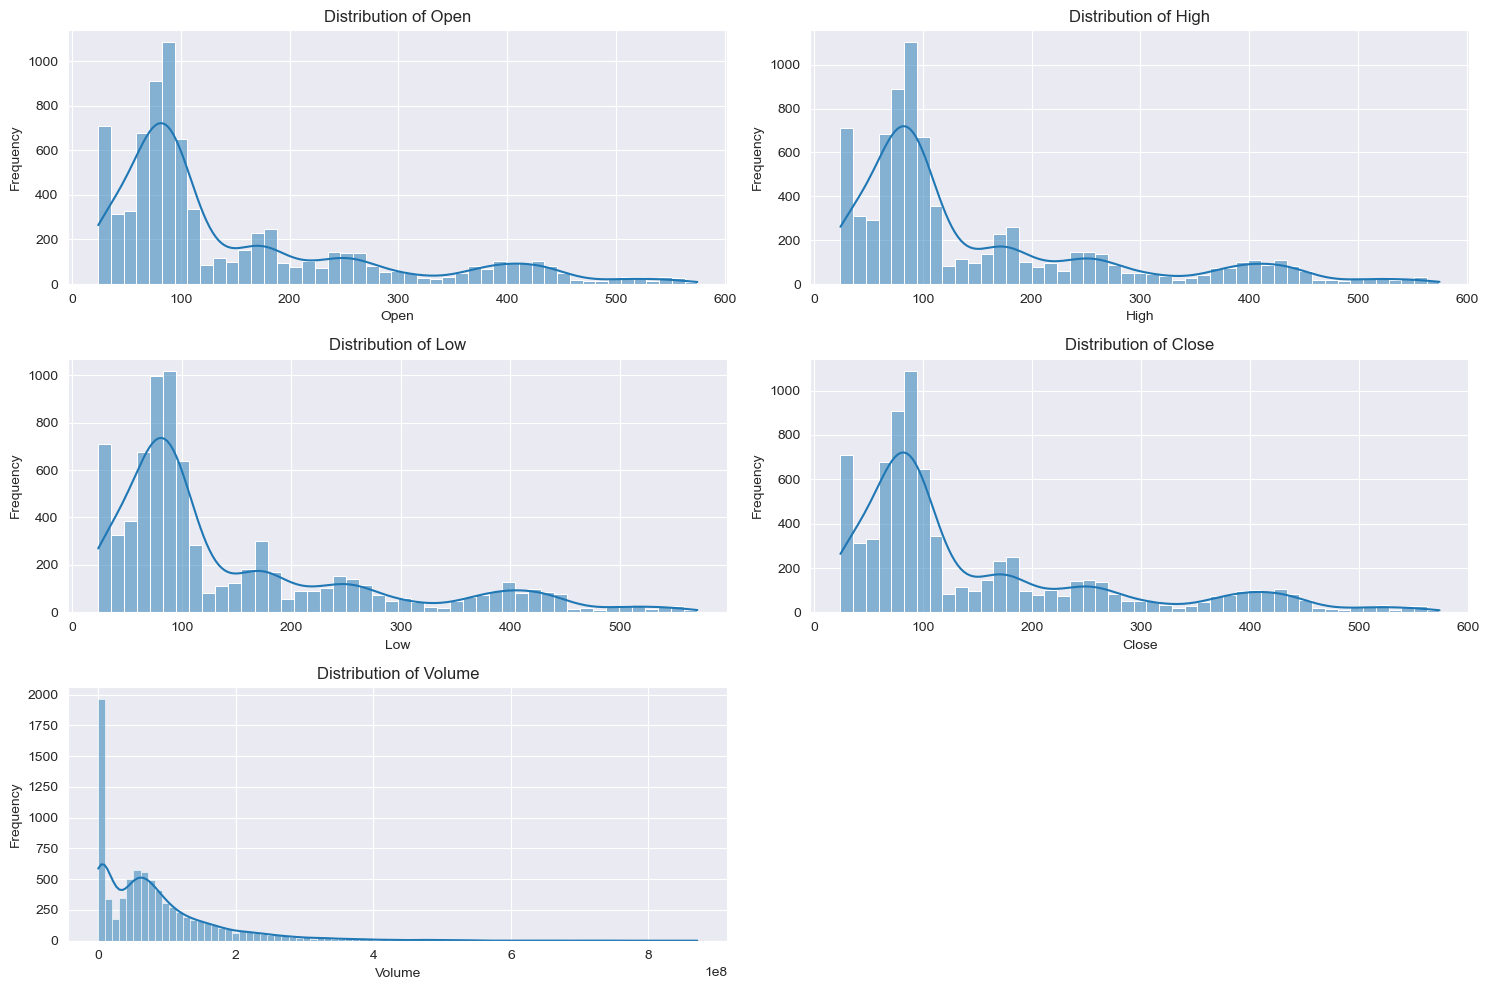

In [9]:
columns = ["Open", "High", "Low", "Close", "Volume"]

# Create a histogram for each numerical variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=spy, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Pair-wise relationships/scatter plots

            Date        Open        High         Low       Close     Volume  \
7033  2021-01-04  355.650101  355.782781  345.709609  349.471649  110210800   
7034  2021-01-05  348.817847  352.987356  348.770449  351.878632   66426200   
7035  2021-01-06  350.343454  357.232648  349.784364  353.982300  107997700   
7036  2021-01-07  356.398757  359.999690  356.218707  359.241608   68766800   
7037  2021-01-08  360.653567  361.506416  357.346392  361.288483   71677200   

      Day  Weekday  Week    Month  Year  Profit?  
7033    4        0     1  January  2021     True  
7034    5        1     1  January  2021     True  
7035    6        2     1  January  2021     True  
7036    7        3     1  January  2021     True  
7037    8        4     1  January  2021     True  


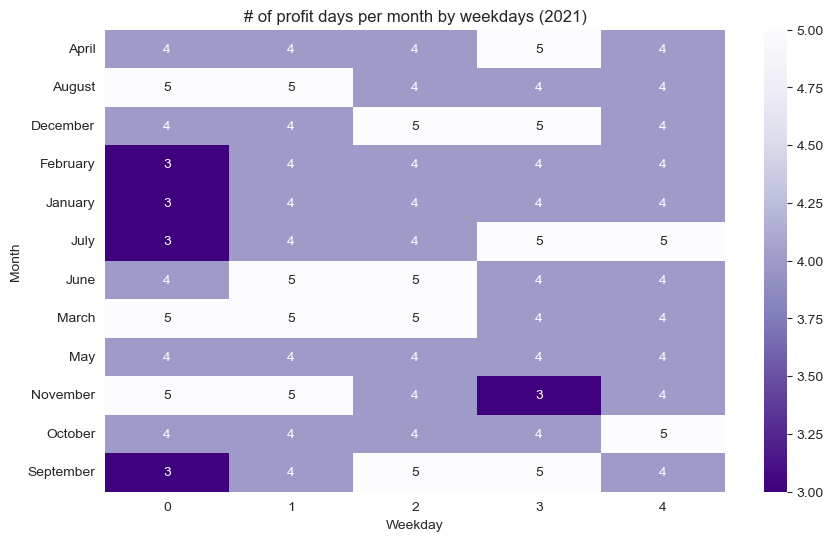

In [12]:
# profit pair wise confusion matrix:
spy_profitable = spy_2021[spy_2021["Profit?"] == True]
print(spy_profitable.head())
crosstab = pd.crosstab(spy_profitable["Month"], spy_profitable["Weekday"])

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="Purples_r", fmt="d")
plt.title("# of profit days per month by weekdays (2021)")
plt.xlabel("Weekday")
plt.ylabel("Month")
plt.show()
# Notes:
# Seems that most days are profitable, but the outstanding data here would be that the LEAST profitable days
# seem to be during the beginning two months of the year, and sometimes during September and November.

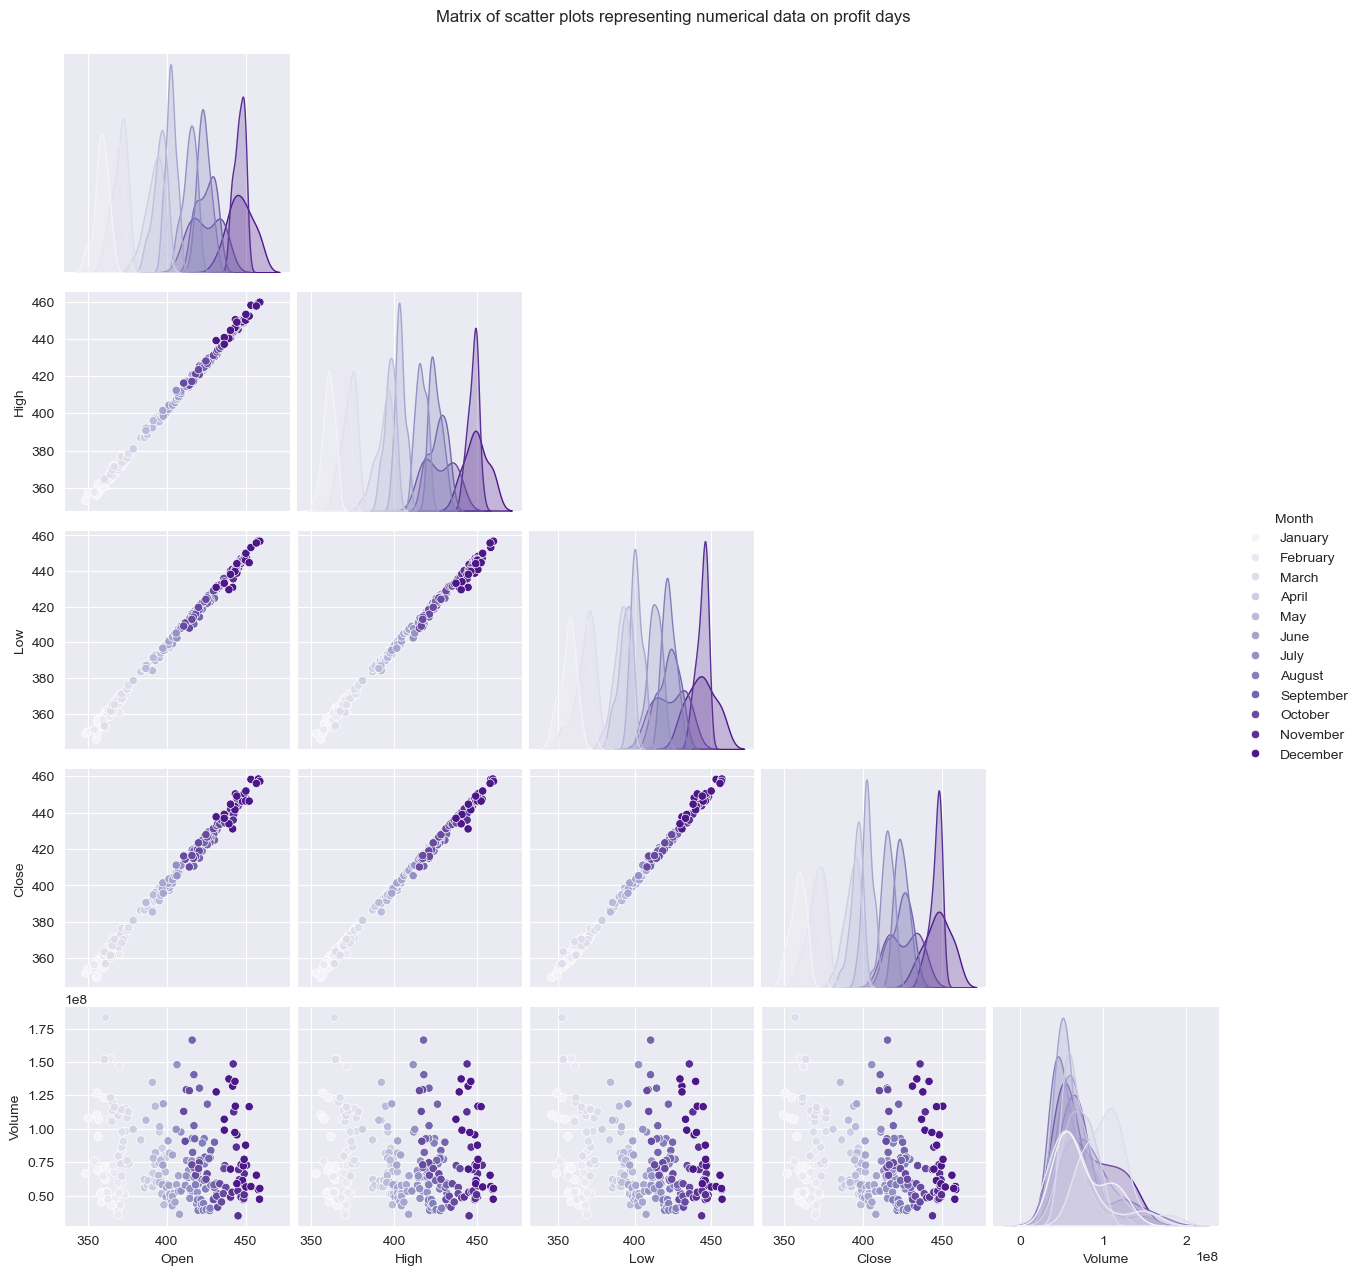

In [14]:
# not exactly sure if the above confusion matrix was a part of what was asked for in "show the pair-wise relationships
# with a matrix of scatter plots", but below is a matrix of scatter plots, despite the confusion matrix above
# being slightly easier to read. however, it's shown above that the months that tend to be profitable
# would be the later months closer to holidays.
sns.pairplot(spy_profitable, vars=["Open", "High", "Low", "Close", "Volume"], hue="Month", palette="Purples", corner=True)

# Set the title
plt.suptitle("Matrix of scatter plots representing numerical data on profit days", y=1.02)
plt.show()